<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>
# <center>K-Nearest Neighbors</center>

<img src = "https://ibm.box.com/shared/static/860wrw1jvullt57vl470fe7zikucwzzh.png", height = 400, width = 400, align = 'right'>
<img src = "https://ibm.box.com/shared/static/f7wewzfjxozemzlhsf7tay1me0alyofa.png", height = 150, width = 150, align = 'left'>

### <b>Welcome to Lab 2a of Machine Learning 101 with Python.</b>
<p><b>Machine Learning is a form of artificial intelligence (AI), where the system can "learn" without explicitly being coded</b></p>

In this lab exercise, you will learn the about the different evaluation models and metrics. You will be able to identify the strengths and weaknesses of each model and how to incorporate the Bias-Variance trade-off to them.


### Some Notebook Commands Reminders:
<ul>
    <li>Run a cell: CTRL + ENTER</li>
    <li>Create a cell above a cell: a</li>
    <li>Create a cell below a cell: b</li>
    <li>Change a cell to Markdown: m</li>
    
    <li>Change a cell to code: y</li>
</ul>

<b> If you are interested in more keyboard shortcuts, go to Help -> Keyboard Shortcuts </b>

<b> <i> Before starting the lab, please run the following code in order to access the solutions </i> </b>

In [1]:
from IPython.core.display import HTML
HTML("""
<style type="text/css">
    #ans:hover { background-color: black; }
    #ans {padding: 6px; 
        background-color: white; 
        border: green 2px solid;
        font-weight: bold}
</style>
""") 

# K-Nearest Neighbors 
In this Lab you will load the Skulls dataset data, fit the data, and use K-Nearest Neighbors to predict a data point. But what is **K-Nearest Neighbors**?

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

---
## <u>Train/Test Split on the Skulls Dataset with K-Nearest Neighbors</u>

### Import Libraries
Import the Following Libraries:
<ul>
    <li> numpy (as np) </li>
    <li> pandas </li>
    <li> KNeighborsClassifier from sklearn.neighbors </li>
</ul>

In [2]:
import numpy as np 
import pandas 
from sklearn.neighbors import KNeighborsClassifier

Hover over the green box below for the answer
<p id="ans"> 
<font color = "white"> import numpy as np <br>
import pandas <br>
from sklearn.neighbors import KNeighborsClassifier</font>
</p>

Using my_data as the <b>skulls.csv</b> data read by panda, declare variables <b>X</b> as the <b>Feature Matrix</b> (<i>data of my_data</i>) and <b>y</b> as the <b>response vector</b> (<i>target</i>)<br>
<i>Note: Use the <b>target</b> function for the <b>response vector</b> and the <b>removeColumns</b> function for the <b>Feature Matrix</b> </i>

In [9]:
my_data = pandas.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/skulls.csv", delimiter=",")
print(my_data.shape)

(150, 6)


In [12]:
def target(numpyArray, targetColumnIndex):
    target_dict = dict()
    target = list()
    count = -1
    for i in range(len(my_data.values)):
        if my_data.values[i][targetColumnIndex] not in target_dict:
            count += 1
            target_dict[my_data.values[i][targetColumnIndex]] = count
        target.append(target_dict[my_data.values[i][targetColumnIndex]])
    print(target)
    print(len(target))
    return np.asarray(target)

In [6]:
# Remove the column containing the target name since it doesn't contain numeric values.
# Also remove the column that contains the row number
# axis=1 means we are removing columns instead of rows.
# Function takes in a pandas array and column numbers and returns a numpy array without
# the stated columns
def removeColumns(pandasArray, *column):
    return pandasArray.drop(pandasArray.columns[[column]], axis=1).values

In [14]:
y  = target(my_data,1)   #these are the class labels
X = removeColumns(my_data,0,1)  #features.
print(y)
print(X)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
[[131 138  89  49]
 [125 131  92  48]
 [131 132  99  50]
 [119 132  96  44]
 [136 143 100  54]
 [138 137  89  56]
 [139 130 108  48]
 [125 136  93  48]
 [131 134 102  51]
 [134 134  99  51]
 [129 138  95  50]
 [134 121  95  53]
 [126 129 1

Hover over the green box below for the answer
<p id="ans"><font color = "white">X = removeColumns(my_data, 0, 1)<br>
y = target(my_data, 1)</font>
</p>

Now to perform <b>train/test split</b> we have to split the <b>X</b> and <b>y</b> into two different sets: The <b>training</b> and <b>testing</b> set. Luckily there is a sklearn function for just that!

Import the <b>train_test_split</b> from <b>sklearn.cross_validation</b>

In [16]:
from sklearn.cross_validation import train_test_split

Hover over the green box below for the answer
<p id="ans"><font color = "white">
from sklearn.cross_validation import train_test_split</font>
</p>

Now <b>train_test_split</b> will return <b>4</b> different parameters. We will name this <b>X_trainset</b>, <b>X_testset</b>, <b>y_trainset</b>, <b>y_testset</b>. The <b>train_test_split</b> will need the parameters <b>X</b>, <b>y</b>, <b>test_size=0.3</b>, and <b>random_state=7</b>. The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures we obtain the same splits.

In [21]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size = 0.3, random_state = 7)
print(len(X_trainset))
print(len(X_testset))
print(len(y_trainset))
print(len(y_testset))

105
45
105
45


Hover over the green box below for the answer
<p id="ans"> 
<font color = "white">
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=7)</font>
</p>

Now let's print the shape of the training sets to see if they match.

In [22]:
print(X_trainset.shape)
print(X_testset.shape)

(105, 4)
(45, 4)


Hover over the green box below for the answer
<p id="ans">
<font color = "white">
print X_trainset.shape<br>
print y_trainset.shape</font>
</p>

Let's check the same with the testing sets! They should both match up!

In [23]:
print(y_trainset.shape)
print(y_testset.shape)

(105,)
(45,)


Hover over the green box below for the answer
<p id="ans"> 
<font color = "white">
print X_testset.shape<br>
print y_testset.shape</font>
</p>

Now similarly with the last lab, let's create declarations of <b>KNeighborsClassifier</b>. Except we will create <b>3</b> different ones:<br>
<b>neigh</b>   -> <b>n_neighbors = 1</b> <br>
<b>neigh23</b> -> <b>n_neighbors = 23</b> <br>
<b>neigh90</b> -> <b>n_neighbors = 90</b> <br>

In [34]:
neigh =  KNeighborsClassifier(n_neighbors = 1)
neigh23 =  KNeighborsClassifier(n_neighbors = 23)
neigh90 =  KNeighborsClassifier(n_neighbors = 90)

Hover over the green box below for the answer
<p id="ans">
<font color = "white">
neigh = KNeighborsClassifier(n_neighbors = 1)<br>
neigh23 = KNeighborsClassifier(n_neighbors = 23)<br>
neigh90 = KNeighborsClassifier(n_neighbors = 90)</font>
</p>

Now we will fit each instance of <b>KNeighborsClassifier</b> with the <b>X_trainset</b> and <b>y_trainset</b>

In [35]:
neigh.fit(X_trainset,y_trainset)
neigh23.fit(X_trainset,y_trainset)
neigh90.fit(X_trainset,y_trainset)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=2,
           weights='uniform')

Hover over the green box below for the answer
<p id="ans">
<font color = "white">
neigh.fit(X_trainset, y_trainset)<br>
neigh23.fit(X_trainset, y_trainset)<br>
neigh90.fit(X_trainset, y_trainset)</font>
</p>

Now in our last lab, we only predicted for <b>one</b> datapoint. However, you are able to predict with <b>multiple</b> datapoints. We can do this by just passing in the <b>y_testset</b> which contains multiple test points into a <b>predict</b> function of <b>KNeighborsClassifier</b>.

Let's pass the <b>y_testset</b> in the <b>predict</b> function each instance of <b>KNeighborsClassifier</b> but store it's returned value into <b>pred</b>, <b>pred23</b>, <b>pred90</b> (corresponding to each of their names)


In [37]:
y1 = neigh.predict(X_testset)
y23 = neigh23.predict(X_testset)
y90 = neigh90.predict(X_testset)
print(y1)
print(y23)
print(y90)
print(y_testset)

[2 2 1 2 1 0 1 1 4 0 4 4 4 1 3 3 1 4 3 0 0 4 0 3 4 3 2 3 1 2 3 4 4 4 1 2 2
 3 1 0 3 4 3 0 3]
[0 3 0 2 0 0 1 4 3 0 4 3 2 4 0 2 3 3 0 0 3 3 0 1 3 4 3 3 3 2 2 3 3 3 0 1 0
 3 1 0 4 0 3 2 3]
[0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 3 3 0 0 0 0 0 3 0 0 0
 3 0 0 3 0 0 0 0]
[4 2 1 2 3 1 1 3 0 1 2 2 1 3 0 2 3 4 1 1 2 4 2 3 4 4 3 2 3 4 4 2 0 4 2 1 1
 0 0 3 4 2 4 3 3]


Hover over the green box below for the answer
<p id="ans">
<font color = "white">
pred = neigh.predict(X_testset)<br>
pred23 = neigh23.predict(X_testset)<br>
pred90 = neigh90.predict(X_testset)</font>
</p>

Awesome! Now let's compute neigh's <b>prediction accuracy</b>. We can do this by using the <b>metrics.accuracy_score</b> function

In [33]:
from sklearn import metrics
print("k=1 Accuracy: ")
print(metrics.accuracy_score(y_testset, y1))
print("k=23 Accuracy: ")
print(metrics.accuracy_score(y_testset, y23))
print("k=90 Accuracy: ")
print(metrics.accuracy_score(y_testset, y90))

k=1 Accuracy: 
0.2222222222222222
k=23 Accuracy: 
0.24444444444444444
k=90 Accuracy: 
0.13333333333333333


Interesting! Let's do the same for the other instances of KNeighborsClassifier.

Hover over the green box below for the answer
<p id="ans">
<font color = "white">
print("Neigh23's Accuracy: "), metrics.accuracy_score(y_testset, pred23)<br>
print("Neigh90's Accuracy: "), metrics.accuracy_score(y_testset, pred90)</font>
</p>

As shown, the accuracy of <b>neigh23</b> is the highest. When <b>n_neighbors = 1</b>, the model was <b>overfit</b> to the training data (<i>too specific</i>) and when <b>n_neighbors = 90</b>, the model was <b>underfit</b> (<i>too generalized</i>). In comparison, <b>n_neighbors = 23</b> had a <b>good balance</b> between <b>Bias</b> and <b>Variance</b>, creating a generalized model that neither <b>underfit</b> the data nor <b>overfit</b> it.

---
## <u>Train/Test Split on the Diabetes Dataset with Linear Regression</u>

#### Now similar to the previous lab, we will be working with the Diabetes Dataset.

### Importing Libraries
Import the following libraries: 
    <ol>- <b>load_diabetes</b> from <b>sklearn.datasets</b></ol>
    <ol>- <b>LinearRegression</b> from <b>sklearn.linear_model</b></ol>
    <ol>- <b>matplotlib.pyplot</b> (as <b>plt</b>) </ol>
<p>Ensure that you include <b>%matplotlib inline</b> to allow the plots to show up in the notebook </p>

In [38]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Hover over the green box below for the answer
<p id="ans">
<font color = "white">
from sklearn.datasets import load_diabetes <br>
from sklearn.linear_model import LinearRegression <br>
import matplotlib.pyplot as plt <br>
%matplotlib inline</font>
</p>

Now create an instance of the diabetes data set by using the <b>load_diabetes</b> function as a variable called <b>diabetes</b>.

In [44]:
diabetes = load_diabetes()


Hover over the green box below for the answer
<p id="ans">
<font color = "white"> diabetes = load_diabetes()</font>
</p>

We will also be working with <b>one feature</b> like the last lab.

In [41]:
diabetes_X = diabetes.data[:, None, 2]
print(diabetes_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

Now create an instance of the LinearRegression called LinReg

In [47]:
LinReg = LinearRegression()
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

Hover over the green box below for the answer
<p id="ans">
<font color = "white"> LinReg = LinearRegression()</font>
</p>

Now let's use <b>diabetes_X</b> as the <b>Feature Matrix</b> and <b>diabetes.target</b> as the <b>response vector</b> and split it up using <b>train_test_split</b> function we imported earlier (<i>If you haven't, please import it</i>). The <b>train_test_split</b> function should have <b>test_size = 0.3</b> and a <b>random state = 7</b>. It should return values to <b>X_trainset</b>, <b>X_testset</b>, <b>y_trainset</b>, <b>y_testset</b> as in previous declarations.

In [46]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(diabetes_X,diabetes.target, test_size = 0.3, random_state=7)

Hover over the green box below for the answer
<p id="ans">
<font color = "white">
X_trainset, X_testset, y_trainset, y_testset = train_test_split(diabetes_X, diabetes.target, test_size=0.3, random_state=7)</font>
</p>

Train the <b>LinReg</b> model using <b>X_trainset</b> and <b>y_trainset</b>

In [48]:
LinReg.fit(X_trainset,y_trainset)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Hover over the green box below for the answer
<p id="ans">
<font color = "white"> LinReg.fit(X_trainset, y_trainset)</font>
</p>

Now let's <i>plot</i> the graph (similar to last time lab)
<p> Use plt's <b>scatter</b> function to plot all the datapoints of <b>X_testset</b> and <b>y_testset</b> and color it <b>black</b> </p>
<p> Use plt's <b>plot</b> function to plot the line of best fit with <b>X_testset</b> and <b>LinReg.predict(X_testset)</b>. Color it <b>blue</b> with a <b>linewidth</b> of <b>3</b>. </p> <br>
<b>Note</b>: Please ignore the FutureWarning. 

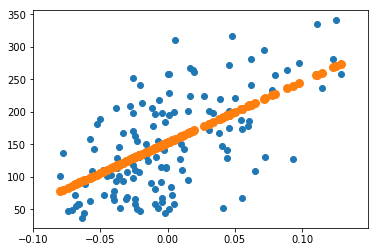

In [55]:
plt.scatter(X_testset,y_testset)
plt.scatter(X_testset,LinReg.predict(X_testset),linewidth=3)

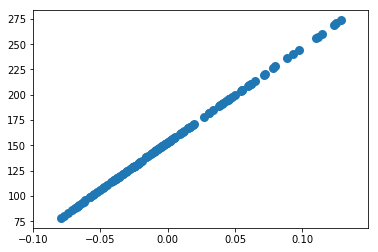

In [54]:
plt.scatter(X_testset,LinReg.predict(X_testset),linewidth=3)

Hover over the green box below for the answer
<p id="ans">
<font color = "white"> plt.scatter(X_testset, y_testset, color='black')<br>
plt.plot(X_testset, LinReg.predict(X_testset), color='blue', linewidth=3)</font>
</p>

Now the prediction line will be based off of the <b>training</b> data. In comparsion, you can see a slight offset, but in general it reflects a good <b>prediction</b>.

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0101EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0101EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0101EN_DSX)

---
# Additional Resources
<br>
K-Nearest Neighbors Algorithm: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm 
<br><br>
Cross-Validation: http://scikit-learn.org/stable/modules/cross_validation.html 
<br><br>
Model Evaluation: http://scikit-learn.org/stable/modules/model_evaluation.html 


<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​